In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
data = pd.read_csv("D:\projects\Titanic Survival Prediction\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

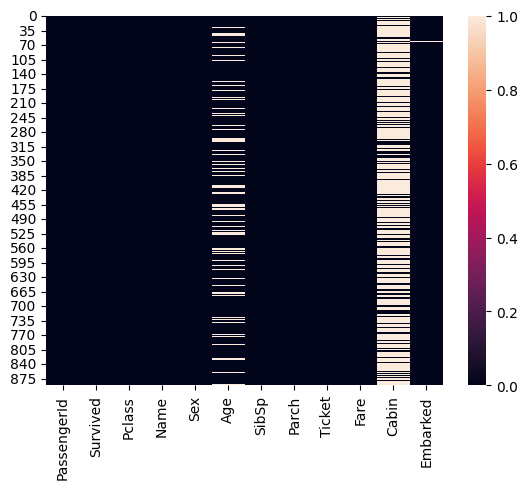

In [46]:
sns.heatmap(data.isna())

In [47]:
data=data.fillna(method ='bfill')
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

<Axes: >

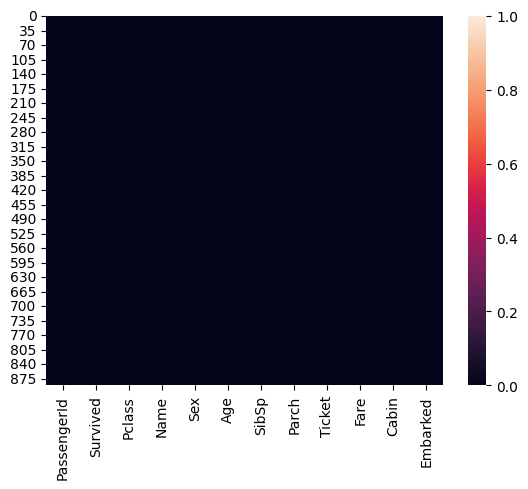

In [48]:
sns.heatmap(data.isna())

In [49]:
data.dropna()
data.shape

(891, 12)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = data.copy() 
df['Name']= label_encoder.fit_transform(df['Name'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Cabin']= label_encoder.fit_transform(df['Cabin'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df['Ticket']= label_encoder.fit_transform(df['Ticket'])

In [52]:
def preprocess(df):
    df['Name']= label_encoder.fit_transform(df['Name'])
    df['Sex']= label_encoder.fit_transform(df['Sex'])
    df['Cabin']= label_encoder.fit_transform(df['Cabin'])
    df['Embarked']= label_encoder.fit_transform(df['Embarked'])
    df['Ticket']= label_encoder.fit_transform(df['Ticket'])
    return df

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,81,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,55,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,129,2


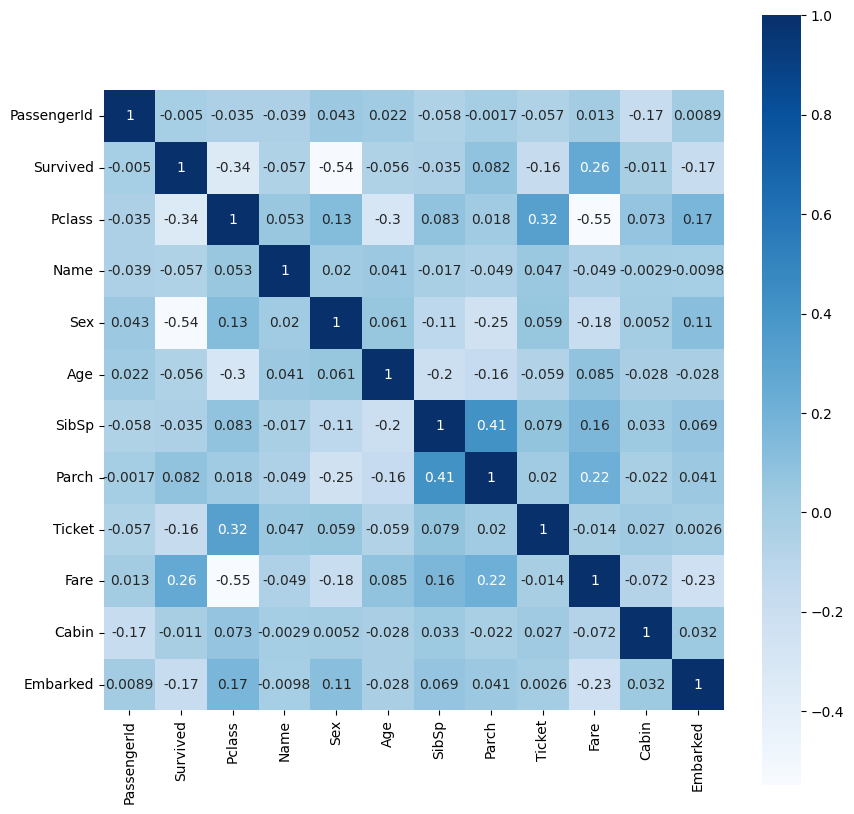

In [54]:
df_corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,square=True,cbar=True,annot=True,cmap='Blues')
plt.show()

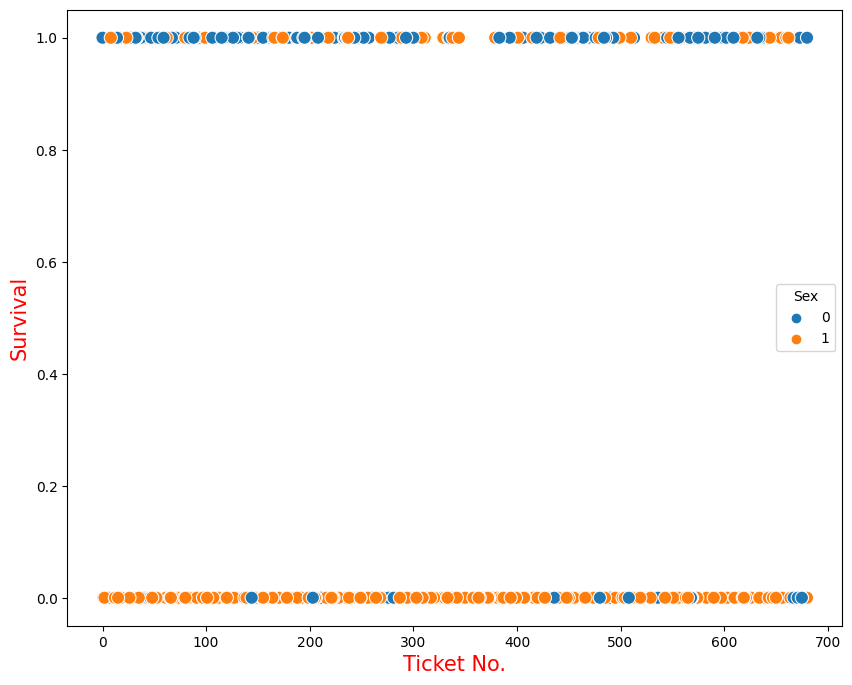

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ticket',y='Survived',data=df,hue='Sex',s=90)
plt.xlabel("Ticket No.",size=15,c="r")
plt.ylabel("Survival",size=15,c="r")
plt.show()

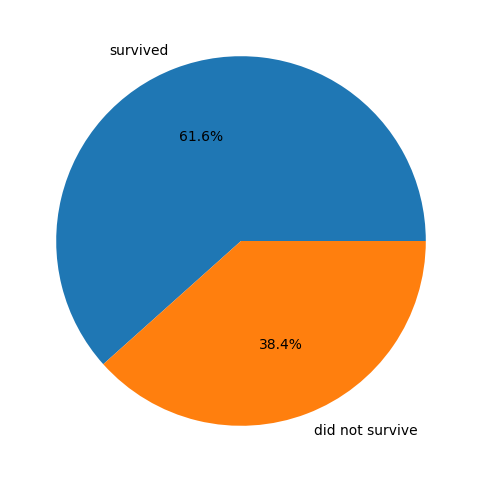

In [56]:
labels = ['survived','did not survive']
info = df['Survived'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(x=info, labels = labels, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

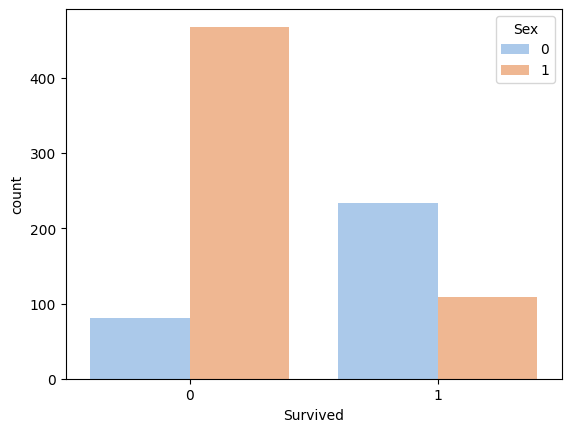

In [57]:
sns.countplot(x='Survived' , data=df , hue='Sex', palette='pastel')

<Axes: >

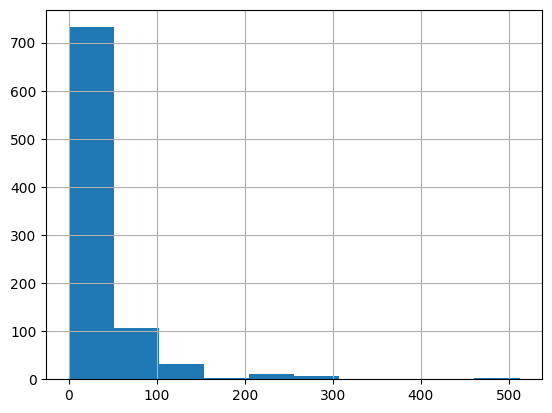

In [58]:
df['Fare'].hist()

c:\Users\Rohan J\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

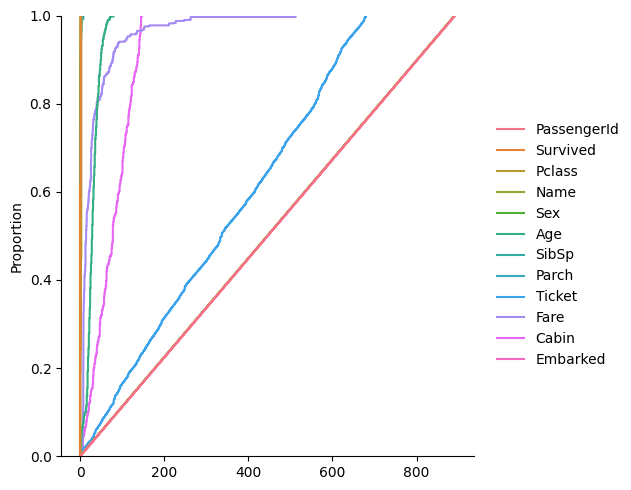

In [59]:
plt.figure(figsize=(10,10))
sns.displot(df,kind= "ecdf")
plt.show()

In [60]:
data = preprocess(data)
X=data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,81,2
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,55,2
3,1,0,35.0,1,0,53.1000,55,2
4,3,1,35.0,0,0,8.0500,129,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,30,2
887,1,0,19.0,0,0,30.0000,30,2
888,3,0,26.0,1,2,23.4500,60,2
889,1,1,26.0,0,0,30.0000,60,0


In [61]:
Y = data['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report

accuracy_score(Y_test, Y_pred)

0.8435754189944135

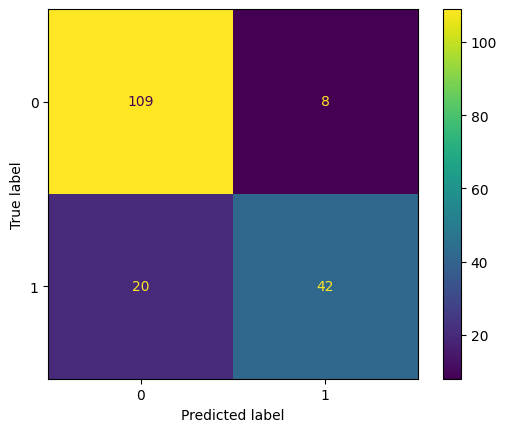

In [65]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

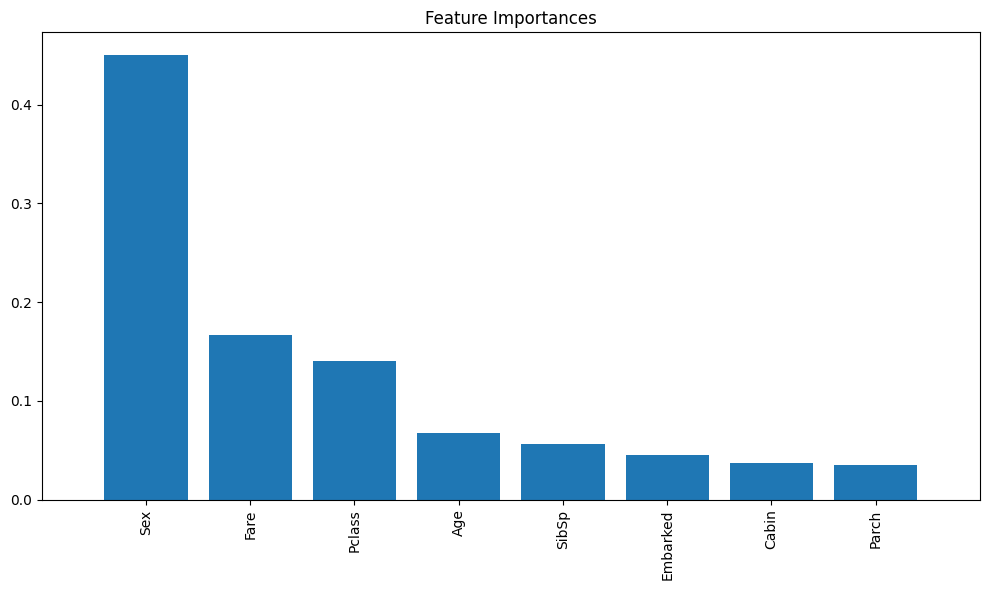

In [73]:
importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


In [66]:
input_data = (3,0,35,0,0,8.05,91,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [67]:
prediction = model.predict(input_data_reshaped)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Alive


c:\Users\Rohan J\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)

clf.fit(X_train, Y_train)

dec_pred = clf.predict(X_test)

In [87]:
accuracy_score(Y_test, dec_pred)

0.8212290502793296

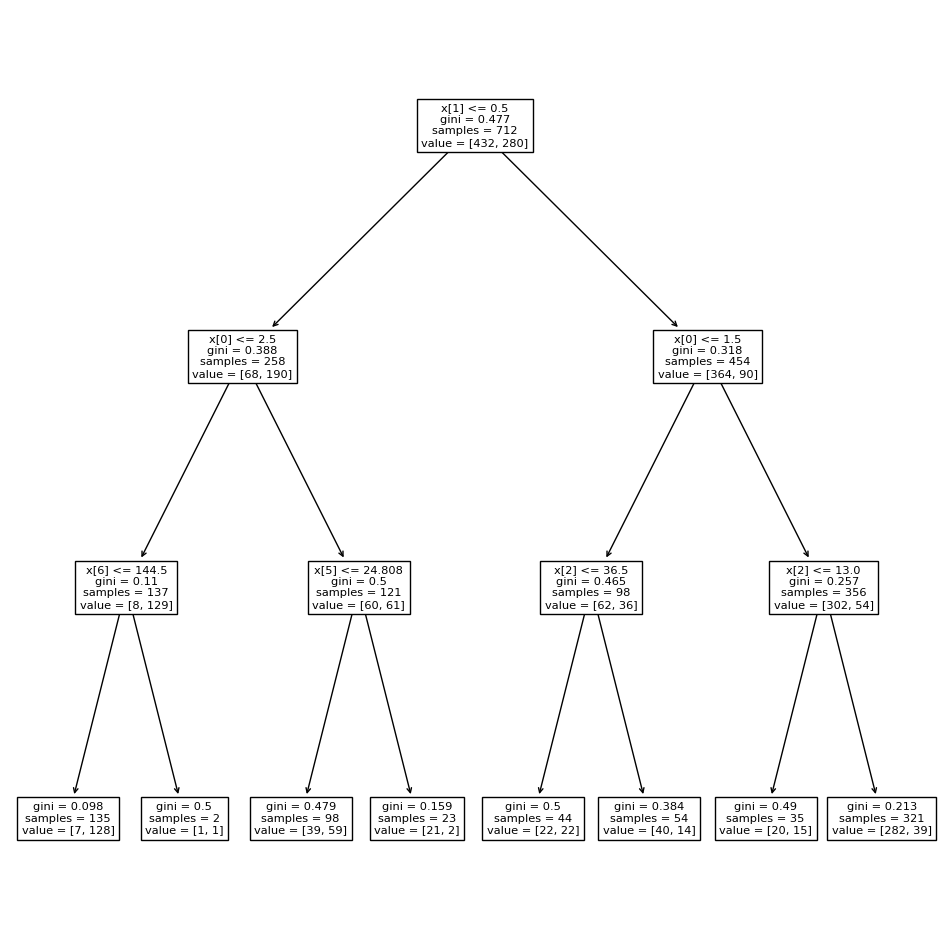

In [90]:
from sklearn import tree

fig = plt.figure(figsize=(12,12))
fig = tree.plot_tree(clf)
plt.show()